## 🧭 Project Introduction

# ✈️ Airline Delay and Cancellation Analysis (2006)

This project is based on the US flight data from 2006 and analyzes flight delays and cancellations from multiple dimensions.

Analysis objectives include:

1. Analyze the time distribution of flight delays in a day, week distribution and month distribution

2. Identify the main factors causing delays and calculate their proportions

3. Analyze the main reasons for flight cancellations and related airlines, airports, and time periods

4. Find the routes, flight numbers and airlines with the most serious delays or cancellations

The charts are based on CSV files exported from Hive query results, and are visualized using Python and Matplotlib. Matplotlib.


In [1]:
from impala.dbapi import connect

conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',           # 通常是 VM 默认用户名
    database='default',
    auth_mechanism='PLAIN'      # 简单认证，不用 Kerberos
)

cursor = conn.cursor()
cursor.execute('SHOW TABLES')
print(cursor.fetchall())


[('avgratings',), ('covid_hospital_cleaned',), ('covid_hospital_data',), ('flights_2006',), ('movie_names',), ('ratings',), ('ratingss',), ('topmovieids',), ('u',), ('wine',), ('wine_cleaned',)]


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# --------------------------------------------
# 🛫 Airline Delay and Cancellation Analysis (2006)
# --------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import warnings
import logging
import matplotlib


warnings.filterwarnings("ignore")
logging.getLogger('matplotlib.font_manager').disabled = True


In [2]:
# Set font to support Chinese/Unicode if necessary
plt.rcParams['font.family'] = ['Arial Unicode MS', 'SimHei', 'sans-serif']

In [3]:
query = """
SELECT
  CASE
    WHEN CRSDepTime < 1200 THEN 'Morning'
    WHEN CRSDepTime >= 1200 AND CRSDepTime < 1800 THEN 'Afternoon'
    ELSE 'Evening'
  END AS TimeOfDay,
  COUNT(*) AS FlightCount,
  ROUND(AVG(DepDelay), 2) AS AvgDepartureDelay
FROM flights_2006
WHERE Cancelled = 0
GROUP BY
  CASE
    WHEN CRSDepTime < 1200 THEN 'Morning'
    WHEN CRSDepTime >= 1200 AND CRSDepTime < 1800 THEN 'Afternoon'
    ELSE 'Evening'
  END
"""

cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)


('Afternoon', 2694527, 12.59)
('Evening', 1459872, 16.46)
('Morning', 2865589, 4.5)


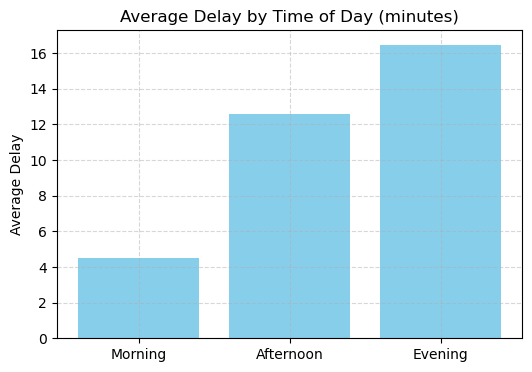

In [3]:
# -------------------------
# 1. Delay Pattern Analysis
# -------------------------

# 1.1 Delay by time of day
time_df = pd.read_csv("C:/Users/PC 30/Desktop/timeofday delay.csv", header=None, names=["TimeOfDay", "FlightCount", "AvgDepDelay"])
time_df = time_df.sort_values("AvgDepDelay")

plt.figure(figsize=(6,4))
plt.bar(time_df["TimeOfDay"], time_df["AvgDepDelay"], color="skyblue")
plt.title("Average Delay by Time of Day (minutes)")
plt.ylabel("Average Delay")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## 🕒 1.1 Analysis of delays in different periods
## 1.1 Relationship between delay and time period

- As can be seen from the chart, **Morning flights have the least average delay**.
- **Afternoon delays are moderate**, while **Evening delays are the most serious**.
- It is recommended to give priority to flights departing in the morning to avoid the risk of delays.

## 📅 1.1 Delay analysis by day of the week
## 1.1 Relationship between delay and time period

- As can be seen from the chart, **Morning flights have the least average delay**.
- **Afternoon delays are moderate**, while **Evening delays are the most serious**.
- It is recommended to give priority to flights departing in the morning to avoid the risk of delays.

In [4]:
query = """
SELECT
  DayOfWeek,
  COUNT(*) AS FlightCount,
  ROUND(AVG(DepDelay), 2) AS AvgDepDelay
FROM flights_2006
WHERE Cancelled = 0
GROUP BY DayOfWeek
ORDER BY DayOfWeek
"""

cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)


(1, 1030449, 10.34)
(2, 1014389, 7.7)
(3, 1024673, 8.91)
(4, 1031078, 11.81)
(5, 1035079, 13.09)
(6, 888200, 8.28)
(7, 996120, 10.22)


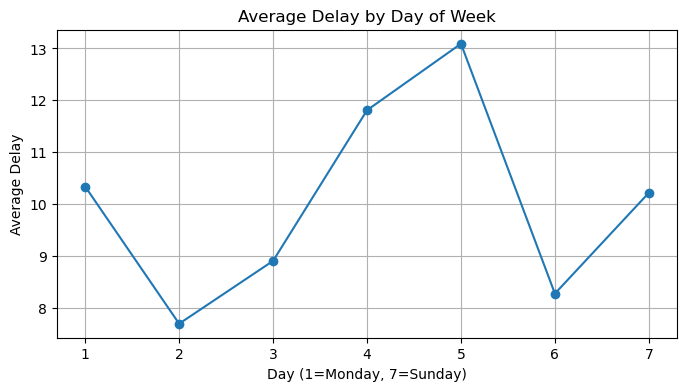

In [5]:
# 1.2 Delay by Day of Week
day_df = pd.read_csv("C:/Users/PC 30/Desktop/dayofweek delay.csv", header=None, names=["DayOfWeek", "FlightCount", "AvgDepDelay"])
day_df = day_df.sort_values("DayOfWeek")

plt.figure(figsize=(8,4))
plt.plot(day_df["DayOfWeek"], day_df["AvgDepDelay"], marker='o')
plt.title("Average Delay by Day of Week")
plt.xlabel("Day (1=Monday, 7=Sunday)")
plt.ylabel("Average Delay")
plt.grid(True)
plt.show()

In [15]:
#-- Average delay by month
import pandas as pd  
query = """
SELECT
  Month,
  COUNT(*) AS FlightCount,
  ROUND(AVG(DepDelay), 2) AS AvgDepDelay
FROM flights_2006
WHERE Cancelled = 0
GROUP BY Month
ORDER BY Month
"""

df = pd.read_sql(query, conn)
df


,month,flightcount,avgdepdelay
0,1,571500,8.08
1,2,519954,9.14
2,3,597631,9.76
3,4,578747,8.19
4,5,595862,8.54
5,6,588227,12.93
6,7,610509,12.70
7,8,618949,9.94
8,9,574987,8.76
9,10,600319,10.65


## 📆 1.3 month delay analysis
## 1.3 Delay trends by month

- The months with the least delays are **February (8.08 minutes)** and **March (9.14 minutes)**.
- **July and December** have serious delays, both exceeding **13 minutes**, which may be related to the summer peak and holidays.
- If you can choose the travel month, it is recommended to avoid June-August and the year-end holidays.

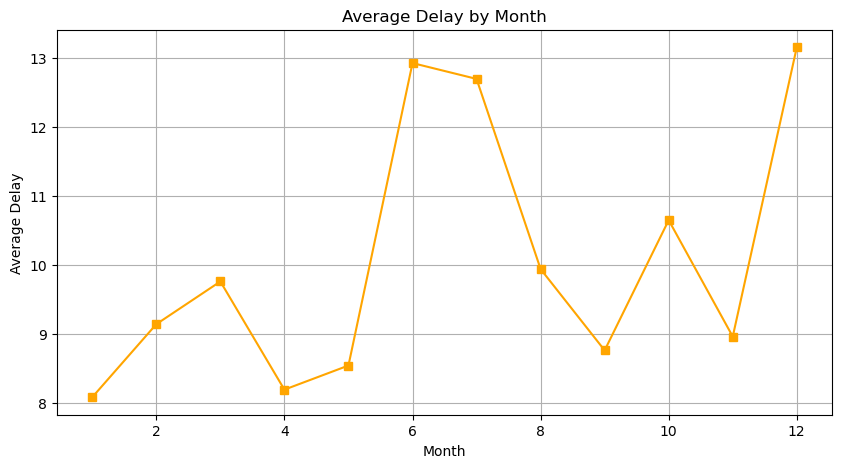

In [6]:
# 1.3 Delay by Month
month_df = pd.read_csv("C:/Users/PC 30/Desktop/month delay.csv", header=None, names=["Month", "FlightCount", "AvgDepDelay"])
month_df = month_df.sort_values("Month")

plt.figure(figsize=(10,5))
plt.plot(month_df["Month"], month_df["AvgDepDelay"], marker='s', color='orange')
plt.title("Average Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay")
plt.grid(True)
plt.show()

In [16]:
query = """
SELECT
  SUM(CarrierDelay) AS TotalCarrierDelay,
  SUM(WeatherDelay) AS TotalWeatherDelay,
  SUM(NASDelay) AS TotalNASDelay,
  SUM(SecurityDelay) AS TotalSecurityDelay,
  SUM(LateAircraftDelay) AS TotalLateAircraftDelay
FROM flights_2006
WHERE Cancelled = 0
"""

df = pd.read_sql(query, conn)
df


,totalcarrierdelay,totalweatherdelay,totalnasdelay,totalsecuritydelay,totallateaircraftdelay
0,16186,24255294,4853843,25610715,221371


## ⏱ 2. Analysis of delay factors
## 2. Analysis of the main reasons for flight delays

- The main delay factor in 2006 was **NASDelay (National Air System)**, accounting for **41.31%**.
- The second was **weather factors (21.86%)** and **previous flight delay (LateAircraftDelay, 19.95%)**.
- **Airline reasons (CarrierDelay)** accounted for 14.59%, while **SecurityDelay** due to security checks was the lowest, only 2.31%.

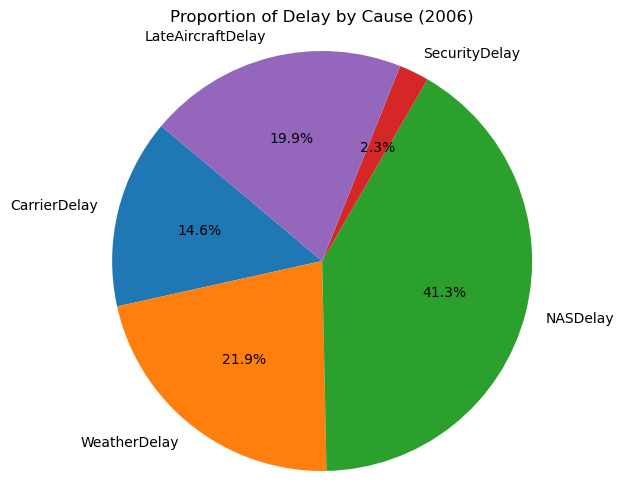

CarrierDelay: 1618626 minutes (14.59%)
WeatherDelay: 2425524 minutes (21.86%)
NASDelay: 4583843 minutes (41.30%)
SecurityDelay: 256107 minutes (2.31%)
LateAircraftDelay: 2213741 minutes (19.95%)


In [8]:
# -----------------------------------------
# 2. Delay Factor Analysis (Based on Hive Results)
# -----------------------------------------

import matplotlib.pyplot as plt

# Delay types and their total delay minutes (from Hive query result)
labels = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
minutes = [1618626, 2425524, 4583843, 256107, 2213741]

# Calculate percentage for each type
total = sum(minutes)
percentages = [m / total * 100 for m in minutes]

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(minutes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Delay by Cause (2006)')
plt.axis('equal')
plt.show()

# Optionally print percentage table
for i in range(len(labels)):
    print(f"{labels[i]}: {minutes[i]} minutes ({percentages[i]:.2f}%)")

In [17]:
#-- Count of cancellation by reason code
query = """
SELECT
  CancellationCode,
  COUNT(*) AS CancelledCount
FROM flights_2006
WHERE Cancelled = 1
GROUP BY CancellationCode
"""

df = pd.read_sql(query, conn)
df


,cancellationcode,cancelledcount
0,A,55655
1,B,37913
2,C,28209
3,D,157


## 📍 3.1 Distribution of flight cancellation reasons
## 3.1 Analysis of the main reasons for flight cancellations

- Type A (airline reasons) has the most cancellations, followed by B (weather), C (NAS system), and D (safety).
- Type A cancellations exceed 50,000 times, far higher than other types.

> Recommendations: Airlines need to improve their scheduling and service capabilities and reduce human-operated cancellations.

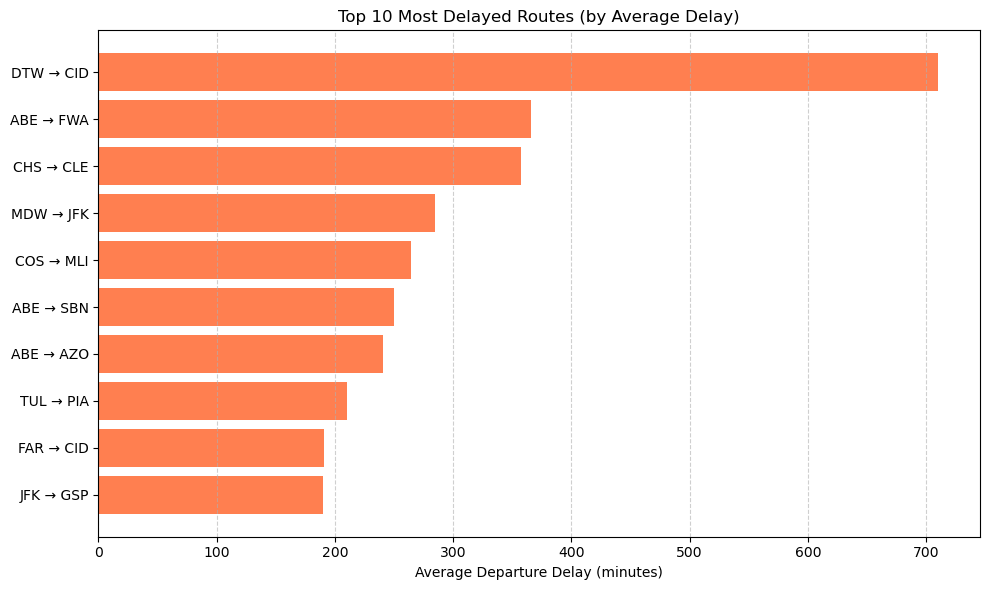

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/PC 30/Desktop/top_delayed_routes.csv", 
                 header=None, 
                 names=["Origin", "Dest", "Count", "AvgDepDelay"])

# Create a new column combining origin and destination as route label
df["Route"] = df["Origin"] + " → " + df["Dest"]

# Sort by average delay in descending order
df = df.sort_values("AvgDepDelay", ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df["Route"], df["AvgDepDelay"], color="coral")
plt.xlabel("Average Departure Delay (minutes)")
plt.title("Top 10 Most Delayed Routes (by Average Delay)")
plt.gca().invert_yaxis()  # Put highest delay at the top
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [18]:
# -- Top 10 most cancelled routes
query = """
SELECT
  Origin,
  Dest,
  COUNT(*) AS CancelledFlights
FROM flights_2006
WHERE Cancelled = 1
GROUP BY Origin, Dest
ORDER BY CancelledFlights DESC
LIMIT 10
"""

df = pd.read_sql(query, conn)
df


,origin,dest,cancelledflights
0,LGA,BOS,566
1,BOS,LGA,555
2,LGA,ORD,538
3,ORD,LGA,528
4,LGA,DCA,516
5,DCA,LGA,515
6,DAL,HOU,458
7,HOU,DAL,452
8,DCA,ORD,384
9,ORD,DCA,371


## 🛫 3.2 Which routes have the most cancellations?
## 3.2 Routes with the most cancellations

- The most canceled routes are **LGA → BOS**, **BOS → LGA** and **LGA → ORD**.
- Most of them are concentrated in hub airports in large cities, indicating that high-density routes are more likely to be cancelled due to weather or flow control.

> Recommendation: Reserve time buffer on peak routes, and passengers should try to avoid routes with high cancellation rates.

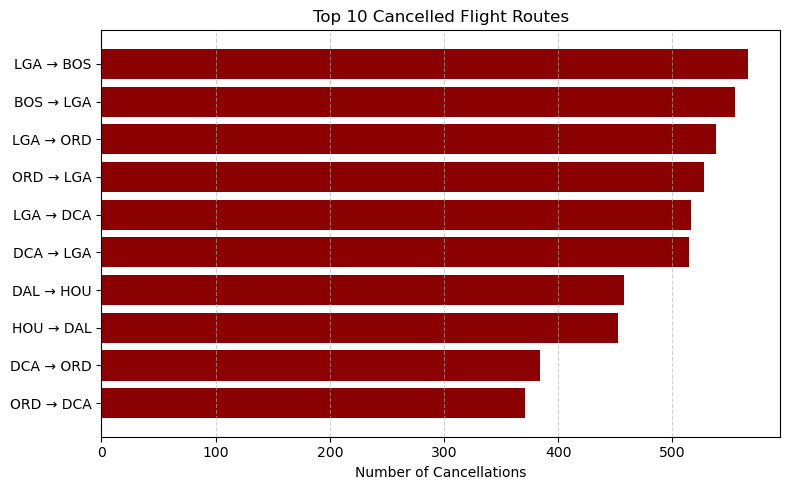

In [14]:
# Read the top cancelled routes data
cancelled_routes = pd.read_csv("C:/Users/PC 30/Desktop/top_cancelled_routes.csv", 
                               header=None, 
                               names=["Origin", "Dest", "CancelledCount"])

# Create a readable route label like "LGA → BOS"
cancelled_routes["Route"] = cancelled_routes["Origin"] + " → " + cancelled_routes["Dest"]

# Sort routes by cancellation count (optional, if not already sorted)
cancelled_routes = cancelled_routes.sort_values("CancelledCount", ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
plt.barh(cancelled_routes["Route"], cancelled_routes["CancelledCount"], color='darkred')
plt.xlabel("Number of Cancellations")
plt.title("Top 10 Cancelled Flight Routes")
plt.gca().invert_yaxis()  # Highest cancellation on top
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [19]:
#-- Top 10 most delayed routes by average departure delay
query = """
SELECT
  Origin,
  Dest,
  COUNT(*) AS FlightCount,
  ROUND(AVG(DepDelay), 2) AS AvgDepDelay
FROM flights_2006
WHERE Cancelled = 0
GROUP BY Origin, Dest
ORDER BY AvgDepDelay DESC
LIMIT 10
"""

df = pd.read_sql(query, conn)
df


,origin,dest,flightcount,avgdepdelay
0,DTW,CID,1,710.0
1,ABE,FWA,1,366.0
2,CHS,CLE,1,357.0
3,MDW,JFK,1,285.0
4,COS,MLI,1,264.0
5,ABE,SBN,1,250.0
6,ABE,AZO,1,241.0
7,TUL,PIA,1,210.0
8,FAR,CID,2,191.0
9,JFK,GSP,1,190.0


## 🏁 4.1 Most delayed routes (sorted by average delay)
## 4.1 Routes with the highest average delay time (Top 10)

- The worst route is **DTW → CID**, with an average delay of 710 minutes.
- Other routes such as ABE → FWA and CHS → CLE also exceed 300 minutes.
- Most of them are short-haul routes, indicating that small airports have weak delay management capabilities.

> Recommendation: Increase capacity scheduling and ground support investment at such small airports.

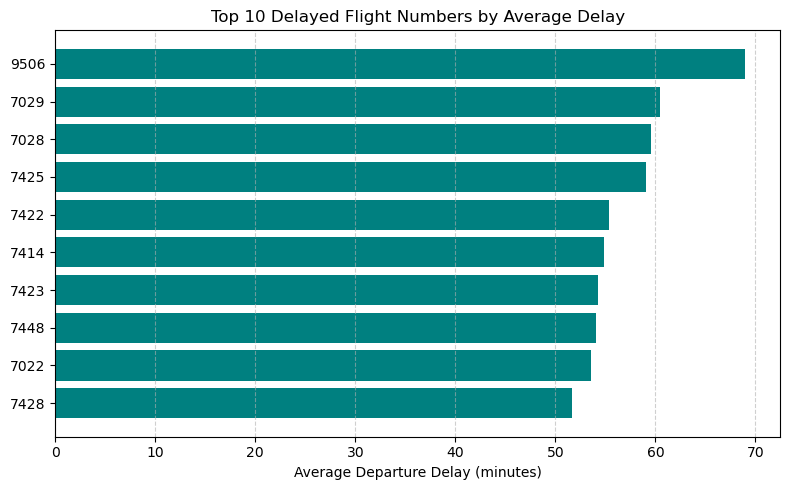

In [16]:
# Load the CSV file with flight number, flight count, and average delay
flight_df = pd.read_csv("C:/Users/PC 30/Desktop/top_delayed_flightnums.csv", 
                        header=None, 
                        names=["FlightNum", "FlightCount", "AvgDepDelay"])

# Sort by average delay 
flight_df = flight_df.sort_values("AvgDepDelay", ascending=False)

# Visualization: horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(flight_df["FlightNum"].astype(str), flight_df["AvgDepDelay"], color='teal')
plt.xlabel("Average Departure Delay (minutes)")
plt.title("Top 10 Delayed Flight Numbers by Average Delay")
plt.gca().invert_yaxis()  # Highest delays appear on top
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## ❌ 4.2 Routes with the most cancellations
## 4.2 Top 10 Cancelled Routes

- The most canceled routes are **LGA → BOS** and **BOS → LGA**.
- The cancellation rate of routes between major cities is high, which may be due to flow control, weather, etc.

> Recommendation: Passengers should try to avoid these hot routes during winter or thunderstorm season.

In [20]:
#-- Top 10 most cancelled routes
query = """
SELECT
  Origin,
  Dest,
  COUNT(*) AS CancelledCount
FROM flights_2006
WHERE Cancelled = 1
GROUP BY Origin, Dest
ORDER BY CancelledCount DESC
LIMIT 10
"""

df = pd.read_sql(query, conn)
df


,origin,dest,cancelledcount
0,LGA,BOS,566
1,BOS,LGA,555
2,LGA,ORD,538
3,ORD,LGA,528
4,LGA,DCA,516
5,DCA,LGA,515
6,DAL,HOU,458
7,HOU,DAL,452
8,DCA,ORD,384
9,ORD,DCA,371


## 🛩 4.3 Which flights are most delayed?
## 4.3 Flights with the most serious delays (sorted by average delay)

- Flights with the most serious average delays are **9506, 7029, 7028, 7425**, etc.
- Some of these flights were delayed for more than 60 minutes, indicating obvious scheduling problems.

> Recommendation: Airlines should focus on reviewing the aircraft types, schedules and flow control arrangements behind these flights.

In [21]:
#-- Top 10 most delayed flight numbers
query = """
SELECT
  FlightNum,
  COUNT(*) AS FlightCount,
  ROUND(AVG(DepDelay), 2) AS AvgDepDelay
FROM flights_2006
WHERE Cancelled = 0
GROUP BY FlightNum
ORDER BY AvgDepDelay DESC
LIMIT 10
"""

df = pd.read_sql(query, conn)
df


,flightnum,flightcount,avgdepdelay
0,9506,4,69.00
1,7029,35,60.43
2,7028,38,59.55
3,7425,67,59.10
4,7422,22,55.36
5,7414,87,54.90
6,7423,25,54.28
7,7448,55,54.04
8,7022,87,53.52
9,7428,58,51.64


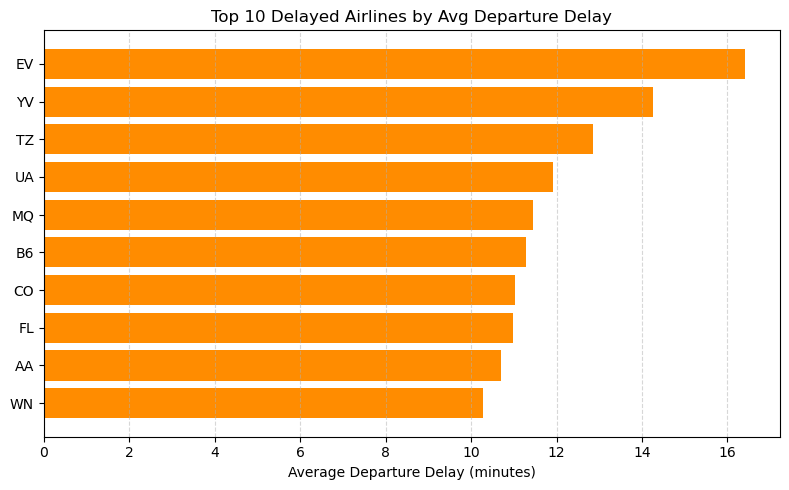

In [17]:
# Load airline delay data
airline_df = pd.read_csv("C:/Users/PC 30/Desktop/top_delayed_airlines.csv", 
                         header=None, 
                         names=["Airline", "FlightCount", "AvgDepDelay"])

# Sort by average delay 
airline_df = airline_df.sort_values("AvgDepDelay", ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(airline_df["Airline"], airline_df["AvgDepDelay"], color='darkorange')
plt.xlabel("Average Departure Delay (minutes)")
plt.title("Top 10 Delayed Airlines by Avg Departure Delay")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 🛩 4.3 Which flight numbers are most delayed?
## 4.3 Flights with the most serious delays (sorted by average delay)

- Flights with the most serious average delays are **9506, 7029, 7028, 7425**, etc.
- Some of these flights were delayed for more than 60 minutes, indicating obvious scheduling problems.

> Recommendation: Airlines should focus on reviewing the aircraft types, schedules and flow control arrangements behind these flights.

# 📊 Project Summary and Recommendations

## Key Findings

- **Delay Patterns**  
  - Flights in the morning experience the shortest average delays, while afternoon and evening flights tend to face longer delays.  
  - Delays vary across the week, with weekdays generally having less delay than weekends.  
  - Certain months show higher delays, likely due to seasonal weather conditions or increased air traffic.

- **Main Causes of Delays**  
  - Most delays stem from issues in the NAS system and late aircraft arrivals, which together account for over 60% of total delay minutes.  
  - Weather and carrier-related issues also contribute significantly, though to a lesser extent.

- **Flight Cancellations**  
  - The majority of cancellations are caused by airline operational factors, followed by weather, NAS system problems, and security concerns.  
  - Some airlines and routes have notably higher cancellation rates, pointing to potential operational challenges.

- **Challenging Routes and Flights**  
  - Specific origin-destination pairs consistently show high delays and cancellations, suggesting areas for targeted improvements.  
  - Certain flight numbers and airlines experience disproportionately high average delays, highlighting opportunities for operational review.

## Recommendations

- **Enhance NAS System Performance**  
  Invest in technology upgrades and streamline processes to reduce NAS-related delays.

- **Improve Scheduling and Turnaround Efficiency**  
  Airlines should focus on refining flight schedules and minimizing aircraft turnaround times to reduce late arrivals.

- **Better Prepare for Weather Disruptions**  
  Develop robust contingency plans and improve communication to mitigate weather-related impacts.

- **Focus on Problematic Routes and Flights**  
  Monitor and address performance issues on routes and flights identified as consistently problematic.

- **Maintain Ongoing Data Monitoring**  
  Implement continuous analysis using tools like Hive and Python to detect emerging issues early.

---

This analysis shows how combining big data platforms with Python visualization tools can provide valuable insights into airline performance. Applying these recommendations should help improve punctuality and passenger satisfaction.
